In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)  # For reproducibility
X = np.random.rand(100, 1) * 10 - 3  # Random values shifted by -3
# Quadratic relationship with noise
# y = 0.5 * x^2 + 1.5 * x + 2 + noise
noise = np.random.randn(100, 1)
Y = 0.5 * X**2 + 1.5 * X + 2 + noise


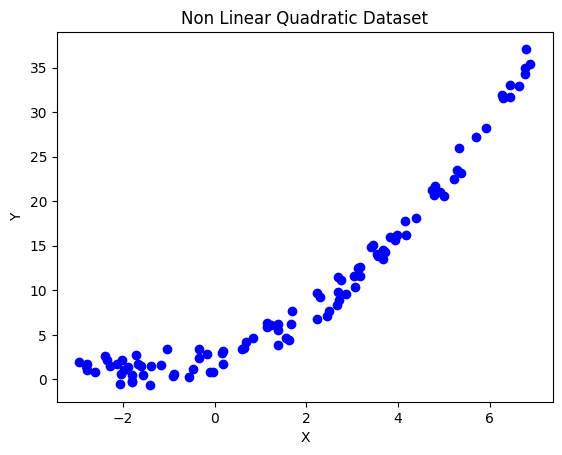

In [6]:
plt.scatter(X,Y,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Quadratic Dataset')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

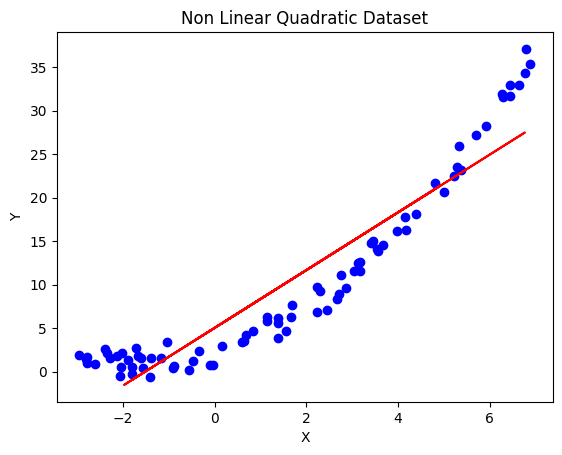

R2 score for simple linear regression: 0.8410


In [10]:
#First, let's fit a simple linear regression model to the training data and evaluate its performance using the R2 score.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train,Y_train)
Y_pred=regression.predict(X_test)
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_train,Y_train,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Quadratic Dataset')
plt.show()
#
score = r2_score(Y_test, Y_pred)
print(f"R2 score for simple linear regression: {score:.4f}")

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

In [12]:
# Transform training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

R2 score for polynomial regression (degree 2): 0.9879


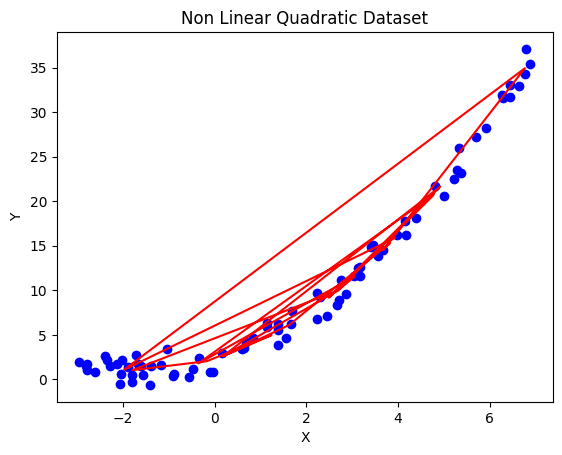

In [14]:
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, Y_train)

Y_pred_poly = regression_poly.predict(X_test_poly)
score_poly = r2_score(Y_test, Y_pred_poly)
print(f"R2 score for polynomial regression (degree 2): {score_poly:.4f}")
plt.plot(X_test,Y_pred_poly,color='red')
plt.scatter(X_train,Y_train,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Quadratic Dataset')
plt.show()

In [15]:
poly3 = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

regression_poly3 = LinearRegression()
regression_poly3.fit(X_train_poly3, Y_train)

Y_pred_poly3 = regression_poly3.predict(X_test_poly3)
score_poly3 = r2_score(Y_test, Y_pred_poly3)
print(f"R2 score for polynomial regression (degree 3): {score_poly3:.4f}")

R2 score for polynomial regression (degree 3): 0.9880


In [16]:
X_new = np.linspace(min(X), max(X), 200).reshape(-1, 1)
X_new_poly = poly3.transform(X_new)

Y_new_pred = regression_poly3.predict(X_new_poly)

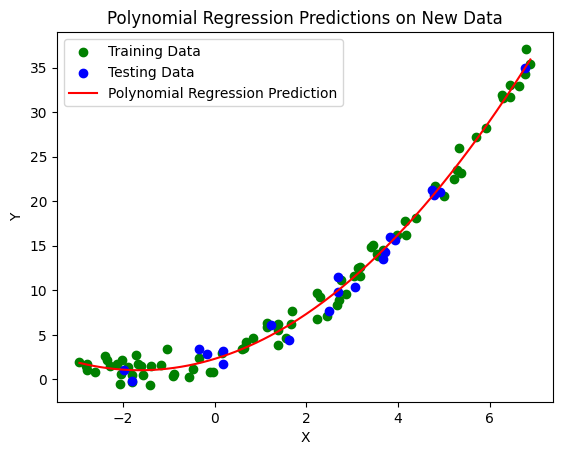

In [17]:
# Plotting predictions for new data along with training and testing points
plt.scatter(X_train, Y_train, color='green', label='Training Data')
plt.scatter(X_test, Y_test, color='blue', label='Testing Data')
plt.plot(X_new, Y_new_pred, color='red', label='Polynomial Regression Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Predictions on New Data')
plt.legend()
plt.show()

In [32]:
# pipeline concepts
 #The idea is to create a generic function where, depending on the polynomial degree you assign, you can see the type of curve fitted to a new dataset.


In [22]:
 from sklearn.pipeline import Pipeline

In [29]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,Y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, Y_train, "b.", linewidth=3)
    plt.plot(X_test, Y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()


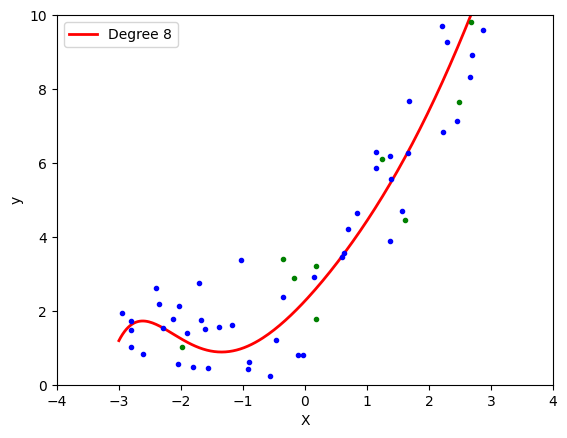

In [31]:
poly_regression(8)